In [1]:
%load_ext autoreload
%autoreload 2

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

sns.set_style('whitegrid')

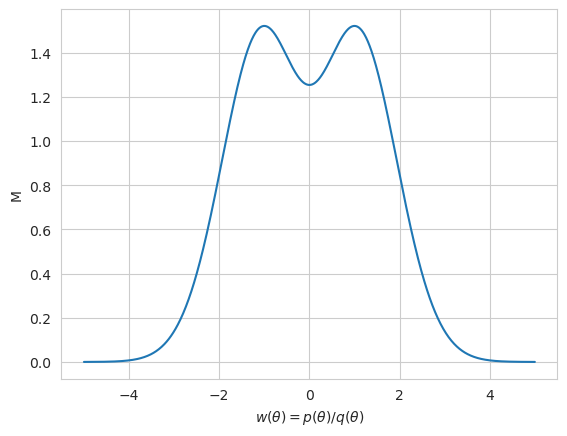

Max M: 1.5203347302924068


In [62]:
theta = np.linspace(-5, 5, 1000)
normal_pdf = stats.norm(loc=0, scale=1).pdf(theta) # target p(θ)
cauchy_pdf = stats.cauchy(loc=0, scale=1).pdf(theta) # proposal q(θ)

w = normal_pdf / cauchy_pdf
plt.plot(theta, w)
plt.xlabel('$w(\\theta) = p(\\theta) / q(\\theta)$')
plt.ylabel('M')
plt.show()

M = np.max(w)
print('Max M:', M)

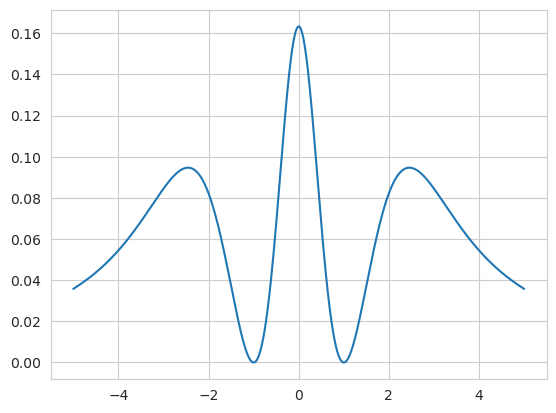

In [68]:
# density of q(θ|z=reject)
plt.plot(theta, (M*cauchy_pdf - normal_pdf)/(M-1))

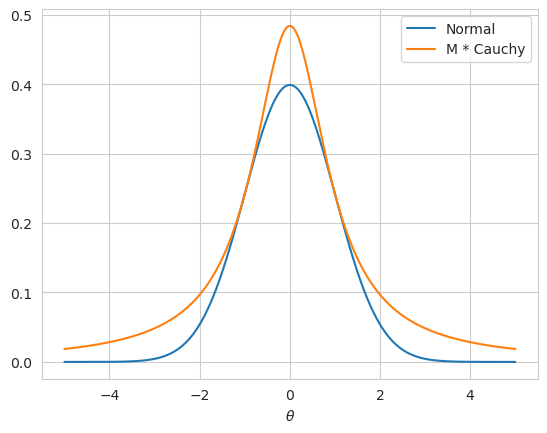

In [22]:
plt.plot(theta, normal_pdf, label='Normal')
plt.plot(theta, M * cauchy_pdf, label='M * Cauchy')
plt.xlabel('$\\theta$')
plt.legend(loc='best')
plt.show()

In [33]:
proposal_theta = stats.cauchy(loc=0, scale=1).rvs(size=100000)

In [44]:
cauchy_likelihood = 1 / (np.pi * (1 + proposal_theta**2))
normal_likelihood = (2*np.pi)**(-1/2) * np.exp(-1/2 * proposal_theta**2)
us = np.random.uniform(0, 1, size=proposal_theta.shape)
ws = normal_likelihood / cauchy_likelihood

In [48]:
accepted_theta = proposal_theta[us < (ws/M)]

<AxesSubplot: ylabel='Density'>

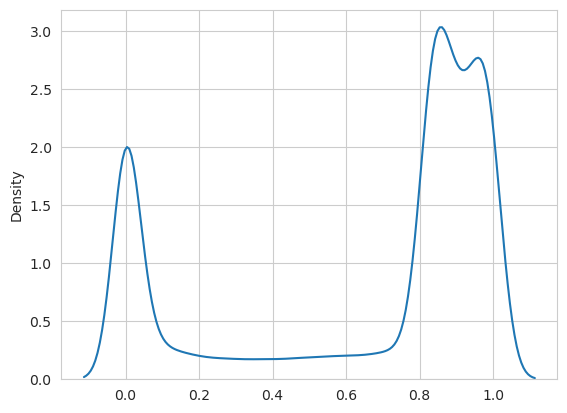

In [46]:
sns.kdeplot(ws/M)

Accept Rate: 0.6568


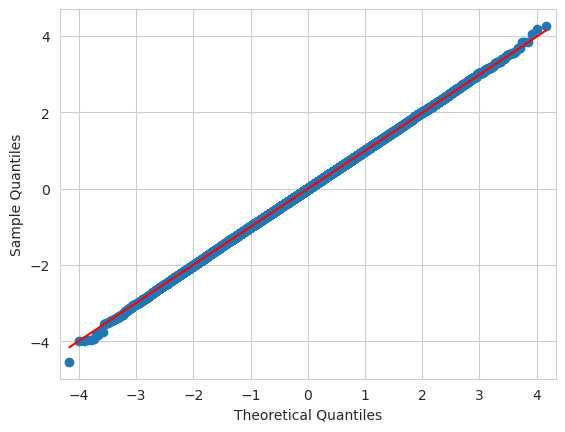

In [54]:
print('Accept Rate:', (us < (ws/M)).mean())
_ = sm.qqplot(accepted_theta, dist=stats.norm, line='q')